# A joint model CAR (model 1) 
# With Crossvalidation
## Two independent processes
 $$ [P , S ] = [P ] [ S ] $$

In [1]:
setwd('/main/app/external_plugins/biospytial_rwrapper/CAR-1SDM/')
source('R/preprocess_data_birds.R')
source("joint.binomial.bymCARModel1.R")

Loading required package: MASS

Loading required package: Rcpp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## MCMC parameters burnin and sample to be consistent with the other models
#n.sample = 10000                                                                                  
#burnin=10000                                                                                      
#postburnin = burnin +1000                                                                         

n.sample = 50000                                                                                 
burnin=40000                                                                                      
postburnin = burnin +1000                                                                         


thin = 10                                                                                          
verbose = TRUE                           

## Make ROC curve
library(pROC)
library('caret')
#trains = createFolds(y = DataFrame$species, k=7, returnTrain = TRUE)

nonas = which(! is.na(DataFrame$species) )
Y_withoutNA = DataFrame$species[nonas]
validate = createFolds(y = Y_withoutNA, k=7, returnTrain = FALSE)


DataFrame$presences <- DataFrame$species

l <- list()
i = 1
DataFrame$predicted_values_CV <- NA
DataFrame$predicted_valuesBernoulli <- NA

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [3]:

formula_sample =  sample ~ Disttoroadm + Populationm
formula_presence = species ~ Elevationm + Precipitationm

for (fold in validate) {
    
    observed.presences <- DataFrame$species[fold]
    ## Substitue by NA
    DataFrame$species[fold] <- NA
    results  <- joint.binomial.bymCARModel1(formula_S = formula_sample, 
                                        formula_P = formula_presence,
                                        n.sample=n.sample,
                                        data = DataFrame,
                                        burnin=burnin,
                                        postburnin=postburnin,
                                        thin=thin,
                                        verbose=TRUE) 

    DataFrame$species <- DataFrame$presences
    ## Return original values
    DataFrame$predicted_values_CV[fold] <- results$fitted.values[fold]
    predicted.probability = results$fitted.values[fold]
    
    ## Generate Bernoulli sample [ Only for the fold data set]
    print("Generating bernoulli sampling...")

    post.joint = data.frame(results$samples$fitted.joint[fold])

    ptot <- post.joint %>% mutate_all(function(p) rbernoulli(1,p))

    sumpt <- colSums(ptot)

    nsamples = dim(ptot)[1]
    

    ProbPS <- sumpt / nsamples
    
    DataFrame$predicted_valuesBernoulli[fold] <- ProbPS
    
    
    pROC_obj <- roc(observed.presences,predicted.probability)

    l[[i]] <- pROC_obj
    i = i + 1
}

Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  145.4 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  144.3 seconds.
Sampling from the joint model 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"
[1] "Generating bernoulli sampling..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  149.6 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  151.4 seconds.
Sampling from the joint model 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"
[1] "Generating bernoulli sampling..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  146.3 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  144.1 seconds.
Sampling from the joint model 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"
[1] "Generating bernoulli sampling..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  144.4 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  143.5 seconds.
Sampling from the joint model 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"
[1] "Generating bernoulli sampling..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  143.2 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  143.1 seconds.
Sampling from the joint model 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"
[1] "Generating bernoulli sampling..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  142.7 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  144.4 seconds.
Sampling from the joint model 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"
[1] "Generating bernoulli sampling..."


Setting levels: control = 0, case = 1

Setting direction: controls > cases



Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  142.7 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  143.1 seconds.
Sampling from the joint model 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"
[1] "Generating bernoulli sampling..."


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”


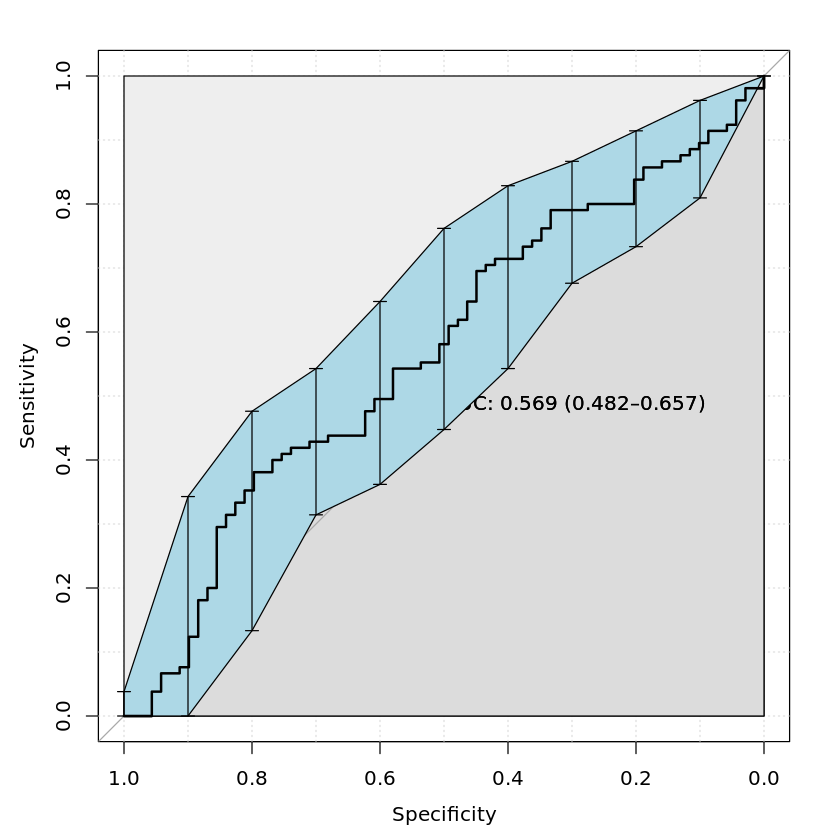

In [4]:
pROC_obj <- roc(DataFrame$presences,DataFrame$predicted_values_CV,
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

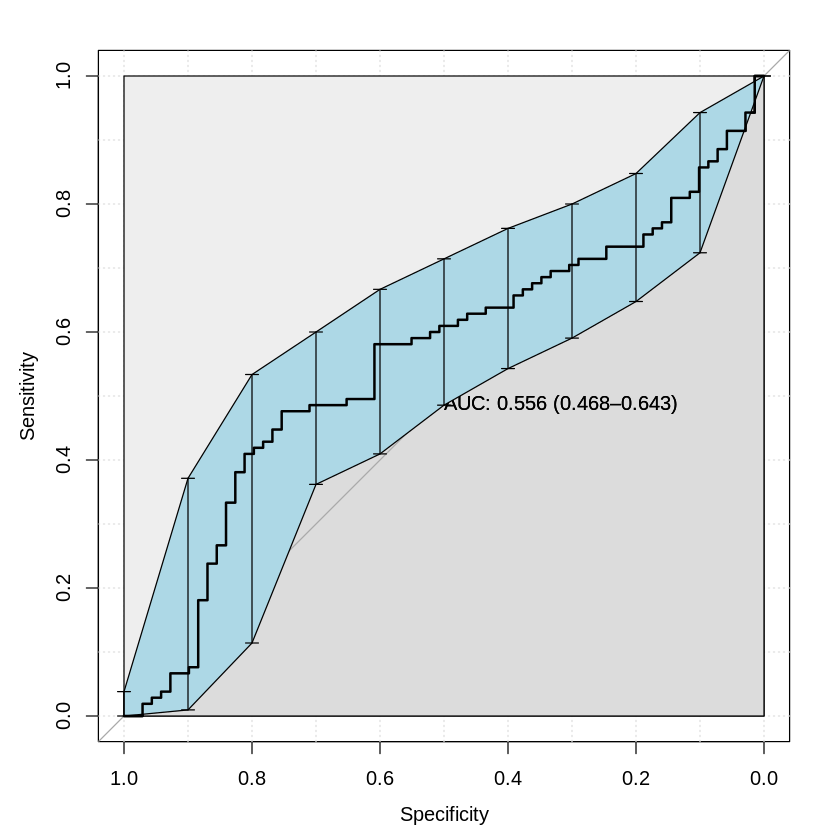

In [6]:
pROC_obj <- roc(DataFrame$presences,DataFrame$predicted_values_CV,
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")

In [1]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')

In [2]:
rm(list=ls())                                                                                     
source("init_data_4_birds.R")                                                                             
# load the building function                                                                      
source("joint.binomial.bymCARModel1.R")

Loading required package: MASS
Loading required package: Rcpp

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

Cross validation of CAR models is not straight forward due to its spatial structure (lattice). 
The approach for this would be with data augmentation.
removing the value for validate.data and change it o NA.

After the model, I'll extract the resulting probability and perform a simple ROC curve.


In [4]:
names(DataFrame)

[1] "X"                         "LUCA"                     
 [3] "Aves"                      "Passeriformes"            
 [5] "Tyrannidae"                "cellids"                  
 [7] "Disttoroadm"               "Elevationm"               
 [9] "MaxTempm"                  "MeanTempm"                
[11] "MinTempm"                  "Populationm"              
[13] "Precipitationm"            "SolarRadiationm"          
[15] "VaporPresm"                "WindSpm"                  
[17] "Longitude"                 "Latitude"                 
[19] "wwfmhtnum"                 "wwfmhtnam"                
[21] "covid"                     "name"                     
[23] "covid2"                    "tipos"                    
[25] "geometry"                  "sample"                   
[27] "species"                   "presences"                
[29] "predicted_values_CV"       "predicted_valuesBernoulli"

In [ ]:
formula_sample =  sample ~ Disttoroadm + Populationm
formula_presence = species ~ Elevationm + Precipitationm
## Complete model
results  <- joint.binomial.bymCARModel1(formula_S = formula_sample, 
                                        formula_P = formula_presence,
                                        n.sample=n.sample,
                                        data = DataFrame,
                                        burnin=burnin,
                                        postburnin=postburnin,
                                        thin=thin,
                                        verbose=TRUE)

Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  55.1 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.


In [ ]:
library(coda)

In [ ]:
plot(results$P$samples$beta)

In [ ]:
## with NA's in Y
results$summary.results

In [14]:
## without NA'sin Y
results$summary.results

DIC           p.d          WAIC           p.w          LMPL 
    3421.2063      986.8115     3487.4308      807.7088    -1921.0294 
loglikelihood 
    -723.7917

In [29]:
## with no NA's in Y
results$summary.results

DIC           p.d          WAIC           p.w          LMPL 
    3517.6101      896.7166     3577.0343      752.2025    -1895.7591 
loglikelihood 
    -862.0884

In [8]:
results$summary.results

DIC           p.d          WAIC           p.w          LMPL 
    4445.8223     1095.6978     4409.9095      848.6759    -2306.2165 
loglikelihood 
   -1127.2133

In [ ]:
results$S$summary.results

In [ ]:
results$P$summary.results

In [30]:
results$P$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),-3.5720,-5.9809,-0.9618,10000,63.7,9.4,-2.3
Elevationm,0.0001,-0.0002,0.0005,10000,63.7,287.2,0.3
MeanTempm,-0.0005,-0.0009,0.0000,10000,63.7,109.7,1.3
tau2,19.4756,13.1363,39.6048,10000,100.0,8.0,-1.3
sigma2,0.0641,0.0280,0.1470,10000,100.0,4.6,3.3


In [ ]:
meanfitted = results$fitted.values

In [ ]:
fitted_samples = cbind(results$S$samples$fitted,results$P$samples$fitted)

post.sample_p = data.frame(results$S$samples$fitted)
post.presence_p = data.frame(results$P$samples$fitted)
post.joint = data.frame(results$samples$fitted.joint)

pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
pps <- post.presence_p %>% mutate_all(function(p) rbernoulli(1,p))
ptot <- post.joint %>% mutate_all(function(p) rbernoulli(1,p))

sumpt <- colSums(ptot)
sumps <- colSums(pss)
sumpp <- colSums(pps)

nsamples = dim(ptot)[1]
print(nsamples)

ProbPS <- sumpt / nsamples
ProbP <- sumpp / nsamples
ProbS <- sumps / nsamples
                                  

In [ ]:
## Compute independent joint distribution
library(boot)

fitted_presences = apply(results$P$samples$fitted,MARGIN=1,identity)
fitted_sample = apply(results$S$samples$fitted,MARGIN=1,identity)
fitted_total = apply(results$samples$fitted,MARGIN=1,identity)

re_presence = apply(results$P$samples$psi,MARGIN=1,identity)
re_sample = apply(results$S$samples$psi,MARGIN=1,identity)

In [ ]:
getUpperLowerCI <- function(fitted_sample,prefix="",MARGIN=1){
    fp = partial(quantile,probs=c(0.025,0.5,0.975))
    quants =apply(X = fitted_sample,FUN = fp,MARGIN)
    mfitt = apply(fitted_sample,mean,MARGIN = MARGIN)
    vfitt = apply(fitted_sample,var,MARGIN = MARGIN)
    new_data = cbind(t(quants),mfitt,vfitt)
    l = as.list(c("q025","median","q0975","mean","variance"))
    nnames = lapply(l,function (x){return(paste(prefix,x,sep = '_'))})
    colnames(new_data) = nnames
    return(new_data)
}

P = getUpperLowerCI(fitted_presences,prefix = 'P')
S = getUpperLowerCI(fitted_sample,prefix = 'S')
PS = getUpperLowerCI(fitted_total,prefix = 'PS')
Gp = getUpperLowerCI(re_presence,prefix = 'Gp')
Gs = getUpperLowerCI(re_sample,prefix = 'Gs')



In [ ]:
## save to posterity
# Save output sample to display in python
## Save the complete chain trace for analysing in Python,
#TDF = read.csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same

## No needed because DataFrame object already loaded and without no-neighbour (i.e. same size as fitted values)
#TDF = TDF[order(TDF$cell_ids),]
TDF = DataFrame[order(DataFrame$cellids),]

In [ ]:
chain = cbind(TDF$cellids,Gp,Gs,P,S,PS,ProbPS,ProbP,ProbS)
file_ = '/outputs/presence_only_models/modelCAR_model1_fitted_tyrannidae.csv'
write.csv(chain,file_)